<a href="https://colab.research.google.com/github/singhbhupender1/ML-notebooks/blob/master/control_model_capacity_with_nodes_and_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Configure Nodes and Layers in Keras
**Keras allows you to easily add nodes and layers to your model.**

**Configuring Model Nodes
The first argument of the layer specifies the number of nodes used in the layer.**

**Fully connected layers for the Multilayer Perceptron, or MLP, model are added via the Dense layer.**

**For example, we can create one fully-connected layer with 32 nodes as follows:**

```
ayer = Dense(32)
```
**Similarly, the number of nodes can be specified for recurrent neural network layers in the same way.**

**For example, we can create one LSTM layer with 32 nodes (or units) as follows:**


```
layer = LSTM(32)
```
**Convolutional neural networks, or CNN, don’t have nodes, instead specify the number of filter maps and their shape. The number and size of filter maps define the capacity of the layer.**

**We can define a two-dimensional CNN with 32 filter maps, each with a size of 3 by 3, as follows:**



```
layer = Conv2D(32, (3,3))
```



##Configuring Model Layers
**Layers are added to a sequential model via calls to the add() function and passing in the layer.**

**Fully connected layers for the MLP can be added via repeated calls to add passing in the configured Dense layers; for example:**



```
model = Sequential()
model.add(Dense(32))
model.add(Dense(64))
```
**Convolutional layers can be stacked directly, and it is common to stack one or two convolutional layers together followed by a pooling layer, then repeat this pattern of layers; for example:**



```
model = Sequential()
model.add(Conv2D(16, (3,3)))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D((2,2)))
```




##Multi-Class Classification Problem
**We will use a standard multi-class classification problem as the basis to demonstrate the effect of model capacity on model performance.**

**The scikit-learn class provides the make_blobs() function that can be used to create a multi-class classification problem with the prescribed number of samples, input variables, classes, and variance of samples within a class.**

**We can configure the problem to have a specific number of input variables via the “n_features” argument, and a specific number of classes or centers via the “centers” argument. The “random_state” can be used to seed the pseudorandom number generator to ensure that we always get the same samples each time the function is called.**

**For example, the call below generates 1,000 examples for a three class problem with two input variables.**



```
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
```
**In order to get a feeling for the complexity of the problem, we can plot each point on a two-dimensional scatter plot and color each point by class value.**

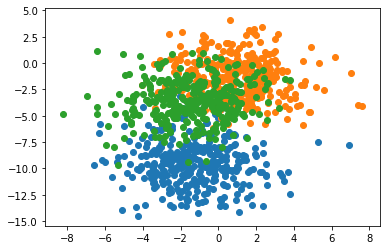

In [3]:
#scatter plot of blobs dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import where
#generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
#scatter plto for each class values
for class_value in range(3):
  #select indices of points with the class label
  row_ix = where(y == class_value)
  #scatter plot of points with a different color
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
#show plot
plt.show()

**n order to explore model capacity, we need more complexity in the problem than three classes and two variables.**

**For the purposes of the following experiments, we will use 100 input features and 20 classes; for example:**



```
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
```



##Change Model Capacity With Nodes
**In this section, we will develop a Multilayer Perceptron model, or MLP, for the blobs multi-class classification problem and demonstrate the effect that the number of nodes has on the ability of the model to learn.**

**We can start off by developing a function to prepare the dataset.**

**The input and output elements of the dataset can be created using the make_blobs() function as described in the previous section.**

**Next, the target variable must be one hot encoded. This is so that the model can learn to predict the probability of an input example belonging to each of the 20 classes.**

**We can use the to_categorical() Keras utility function to do this, for example:**

**Next, we can split the 1,000 examples in half and use 500 examples as the training dataset and 500 to evaluate the model.**

**The create_dataset() function below ties these elements together and returns the train and test sets in terms of the input and output elements.**

In [0]:
#prepare multiclass classification dataset
def create_dataset():
  #generate 2d classification datast
  X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
  #one hot encode output varivale
  y = to_categorical(y)
  #split in to train test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, testX, trainy, testy


**We can call this function to prepare the dataset.**

In [5]:
#crate dataset
trainX, trainy, testX, testy = create_dataset()

NameError: ignored

**Next, we can define a function that will create the model, fit it on the training dataset, and then evaluate it on the test dataset.**

**The model needs to know the number of input variables in order to configure the input layer and the number of target classes in order to configure the output layer. These properties can be extracted from the training dataset directly.**



```
# configure the model based on the data
n_input, n_classes = trainX.shape[1], testy.shape[1]
```
**We will define an MLP model with a single hidden layer that uses the rectified linear activation function and the He random weight initialization method.**

**The output layer will use the softmax activation function in order to predict a probability for each target class. The number of nodes in the hidden layer will be provided via an argument called “n_nodes“.**



```
# define model
model = Sequential()
model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(n_classes, activation='softmax'))
```



**The model will be optimized using stochastic gradient descent with a modest learning rate of 0.01 with a high momentum of 0.9, and a categorical cross entropy loss function will be used, suitable for multi-class classification.**



```
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
```
**he model will be fit for 100 training epochs, then the model will be evaluated on the test dataset.**



```
# fit model on train set
history = model.fit(trainX, trainy, epochs=100, verbose=0)
# evaluate model on test set
_, test_acc = model.evaluate(testX, testy, verbose=0)
```



**Tying these elements together, the evaluate_model() function below takes the number of nodes and dataset as arguments and returns the history of the training loss at the end of each epoch and the accuracy of the final model on the test dataset.**



```
# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
	# configure the model based on the data
	n_input, n_classes = trainX.shape[1], testy.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(n_classes, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model on train set
	history = model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model on test set
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return history, test_acc
```



**We can call this function with different numbers of nodes to use in the hidden layer.**

**The problem is relatively simple; therefore, we will review the performance of the model with 1 to 7 nodes.**

**We would expect that as the number of nodes is increased, that this would increase the capacity of the model and allow the model to better learn the training dataset, at least to a point limited by the chosen configuration for the learning algorithm (e.g. learning rate, batch size, and epochs).**

**The test accuracy for each configuration will be printed and the learning curves of training accuracy with each configuration will be plotted.**



```
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
	# evaluate model with a given number of nodes
	history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
	# summarize final test set accuracy
	print('nodes=%d: %.3f' % (n_nodes, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_nodes))
# show the plot
pyplot.legend()
pyplot.show()
```
**The full code listing is provided below for completeness.**


Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








nodes=1: 0.154
nodes=2: 0.396
nodes=4: 0.836
nodes=5: 0.792
nodes=6: 0.900
nodes=7: 0.998


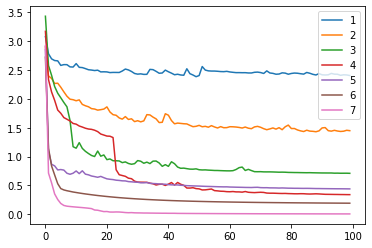

In [6]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 
# prepare multi-class classification dataset
def create_dataset():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
	# configure the model based on the data
	n_input, n_classes = trainX.shape[1], testy.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(n_classes, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model on train set
	history = model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model on test set
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return history, test_acc
 
# prepare dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
	# evaluate model with a given number of nodes
	history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
	# summarize final test set accuracy
	print('nodes=%d: %.3f' % (n_nodes, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_nodes))
# show the plot
pyplot.legend()
pyplot.show()

**In this case, we can see that as the number of nodes is increased, the capacity of the model to learn the problem is increased. This results in a progressive lowering of the generalization error of the model on the test dataset until 6 and 7 nodes when the model learns the problem perfectly**

**A line plot is also created showing cross entropy loss on the training dataset for each model configuration (1 to 7 nodes in the hidden layer) over the 100 training epochs.**

**We can see that as the number of nodes is increased, the model is able to better decrease the loss, e.g. to better learn the training dataset. This plot shows the direct relationship between model capacity, as defined by the number of nodes in the hidden layer and the model’s ability to learn.**

##Change Model Capacity With Layers
**We can perform a similar analysis and evaluate how the number of layers impacts the ability of the model to learn the mapping function.**

**Increasing the number of layers can often greatly increase the capacity of the model, acting like a computational and learning shortcut to modeling a problem. For example, a model with one hidden layer of 10 nodes is not equivalent to a model with two hidden layers with five nodes each. The latter has a much greater capacity.**

**The danger is that a model with more capacity than is required is likely to overfit the training data, and as with a model that has too many nodes, a model with too many layers will likely be unable to learn the training dataset, getting lost or stuck during the optimization process.**

**First, we can update the evaluate_model() function to fit an MLP model with a given number of layers.**

**We know from the previous section that an MLP with about seven or more nodes fit for 100 epochs will learn the problem perfectly. We will, therefore, use 10 nodes in each layer to ensure the model has enough capacity in just one layer to learn the problem.**

**The updated function is listed below, taking the number of layers and dataset as arguments and returning the training history and test accuracy of the model.**



```
# fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
	# configure the model based on the data
	n_input, n_classes = trainX.shape[1], testy.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	for _ in range(1, n_layers):
		model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(n_classes, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model on test set
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return history, test_acc
```



**Given that a single hidden layer model has enough capacity to learn this problem, we will explore increasing the number of layers to the point where the learning algorithm becomes unstable and can no longer learn the problem.**

**If the chosen modeling problem was more complex, we could explore increasing the layers and review the improvements in model performance to a point of diminishing returns.**

**In this case, we will evaluate the model with 1 to 5 layers, with the expectation that at some point, the number of layers will result in a model that the chosen learning algorithm is unable to adapt to the training data.**



```
# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:
	# evaluate model with a given number of layers
	history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
	print('layers=%d: %.3f' % (n_layers, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_layers))
pyplot.legend()
pyplot.show()
```



layers=1: 1.000
layers=2: 0.954
layers=3: 0.294
layers=4: 0.934
layers=5: 0.996


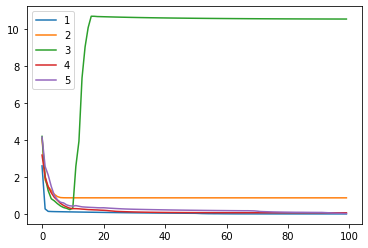

In [7]:
# study of mlp learning curves given different number of layers for multi-class classification
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 
# prepare multi-class classification dataset
def create_dataset():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
	# configure the model based on the data
	n_input, n_classes = trainX.shape[1], testy.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	for _ in range(1, n_layers):
		model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(n_classes, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model on test set
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return history, test_acc
 
# get dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:
	# evaluate model with a given number of layers
	history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
	print('layers=%d: %.3f' % (n_layers, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_layers))
pyplot.legend()
pyplot.show()


**In this case, we can see that the model is capable of learning the problem well with up to three layers, then begins to falter. We can see that performance really drops with five layers and is expected to continue to fall if the number of layers is increased further.**

**A line plot is also created showing cross entropy loss on the training dataset for each model configuration (1 to 5 layers) over the 100 training epochs.**

**We can see that the dynamics of the model with 1, 2, and 3 models (blue, orange and green) are pretty similar, learning the problem quickly.**

**Surprisingly, training loss with four and five layers shows signs of initially doing well, then leaping up, suggesting that the model is likely stuck with a sub-optimal set of weights rather than overfitting the training dataset.**

**The analysis shows that increasing the capacity of the model via increasing depth is a very effective tool that must be used with caution as it can quickly result in a model with a large capacity that may not be capable of learning the training dataset easily.**